선형회귀 모델

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data2.csv')
df.head()

,Sal,Pro,Sec,Crate,Ofc,Rate,Obr,Tre,Sco,Sum,Tos,Mat,Lda,Pre,Pop,Hpol,Hpoh,Clp,Beg
0,61174,17658,1.00,1159.05,25000,1511.36,42.54,0.75,3,28,0.107,0,20220715,52700,25000,23000,25000,43250,50000
1,60760,2506,0.83,682.13,18600,1616.27,5.92,0.67,12,45,0.267,0,20220714,14250,18600,15000,18600,16450,18400
2,10383,-13496,1.00,1727.38,13000,1623.41,11.58,1.00,4,56,0.071,0,20220701,12000,13000,9900,11600,14300,17150
3,418527,24895,1.00,111.26,16200,955.00,1.39,0.88,0,59,0.000,0,20220623,9330,16200,14200,16200,11000,14600
4,3879,-7665,1.00,1845.11,16000,1442.95,12.43,0.89,2,54,0.037,0,20220624,12400,16000,12000,14000,17350,20600


In [3]:
x_data = df[['Crate', 'Ofc', 'Rate', 'Obr', 'Tre', 'Tos']]
x_data.head()

,Crate,Ofc,Rate,Obr,Tre,Tos
0,1159.05,25000,1511.36,42.54,0.75,0.107
1,682.13,18600,1616.27,5.92,0.67,0.267
2,1727.38,13000,1623.41,11.58,1.00,0.071
3,111.26,16200,955.00,1.39,0.88,0.000
4,1845.11,16000,1442.95,12.43,0.89,0.037


In [4]:
y_data = df['Beg']
y_data

0      50000
1      18400
2      17150
3      14600
4      20600
       ...  
386    71000
387     8190
388    21650
389    16600
390    13300
Name: Beg, Length: 391, dtype: int64

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_data = min_max_scaler.fit_transform(x_data)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

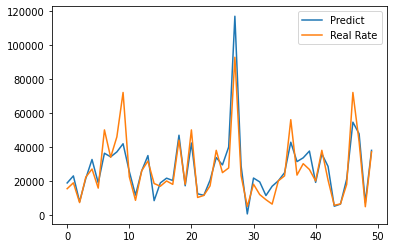

In [8]:
plt.plot(mlr.predict(X_test[:50]), label="Predict")
plt.plot(y_test[:50].values.reshape(-1, 1), label="Real Rate")
plt.legend()

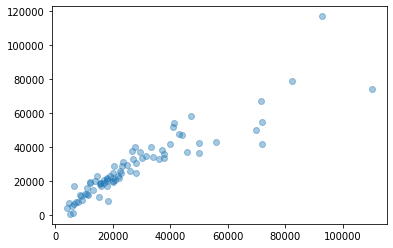

In [9]:
y_predict = mlr.predict(X_test)

plt.scatter(y_test, y_predict, alpha = 0.4)
plt.show()

In [10]:
print(mlr.score(X_train, y_train))

0.8923288043665756


In [11]:
x_data = df[["Sal","Pro","Sec","Crate","Ofc","Rate","Obr","Tre","Sco","Sum","Tos","Mat","Lda","Pre","Pop","Hpol","Hpoh"]]
x_data.head()

,Sal,Pro,Sec,Crate,Ofc,Rate,Obr,Tre,Sco,Sum,Tos,Mat,Lda,Pre,Pop,Hpol,Hpoh
0,61174,17658,1.00,1159.05,25000,1511.36,42.54,0.75,3,28,0.107,0,20220715,52700,25000,23000,25000
1,60760,2506,0.83,682.13,18600,1616.27,5.92,0.67,12,45,0.267,0,20220714,14250,18600,15000,18600
2,10383,-13496,1.00,1727.38,13000,1623.41,11.58,1.00,4,56,0.071,0,20220701,12000,13000,9900,11600
3,418527,24895,1.00,111.26,16200,955.00,1.39,0.88,0,59,0.000,0,20220623,9330,16200,14200,16200
4,3879,-7665,1.00,1845.11,16000,1442.95,12.43,0.89,2,54,0.037,0,20220624,12400,16000,12000,14000


In [12]:
y_data = df['Beg']
y_data

0      50000
1      18400
2      17150
3      14600
4      20600
       ...  
386    71000
387     8190
388    21650
389    16600
390    13300
Name: Beg, Length: 391, dtype: int64

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
X_data = min_max_scaler.fit_transform(x_data)

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42)

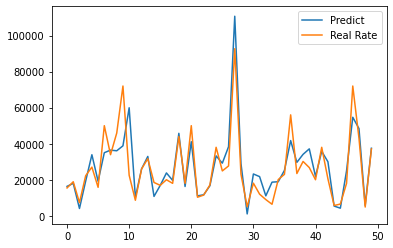

In [14]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

plt.plot(mlr.predict(X_test[:50]), label="Predict")
plt.plot(y_test[:50].values.reshape(-1, 1), label="Real Rate")
plt.legend()

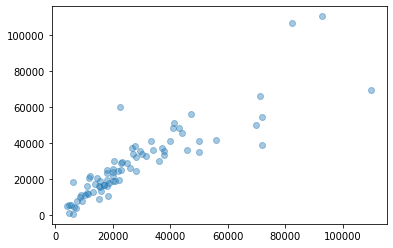

In [15]:
y_predict = mlr.predict(X_test)

plt.scatter(y_test, y_predict, alpha = 0.4)
plt.show()

In [16]:
print(mlr.score(X_train, y_train))

0.9139800423526426


이상치 시각화 및 제거

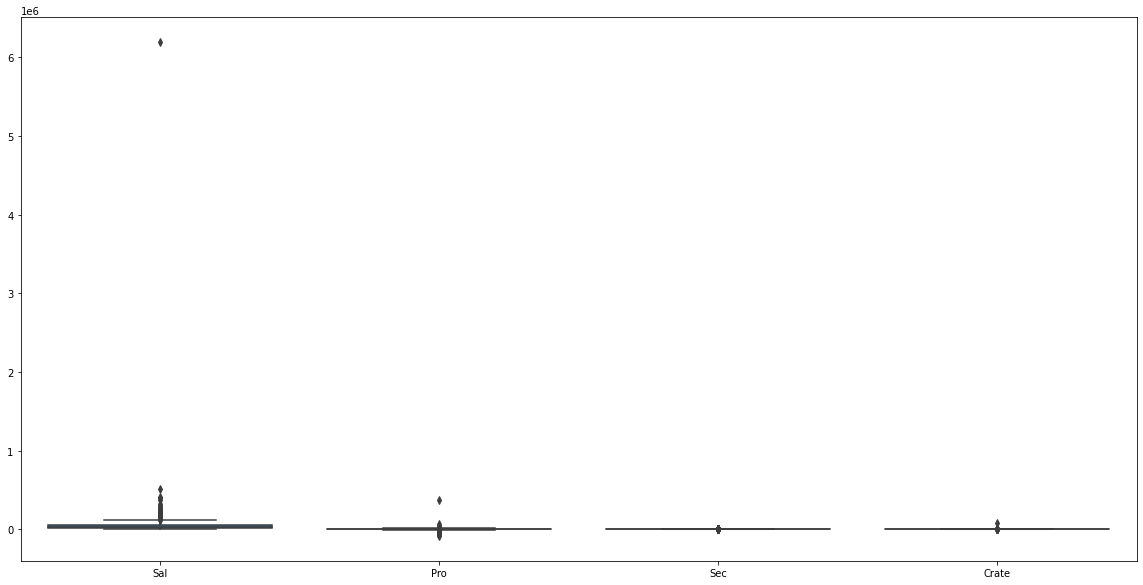

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(data=x_data[["Sal","Pro","Sec","Crate"]])
plt.show()

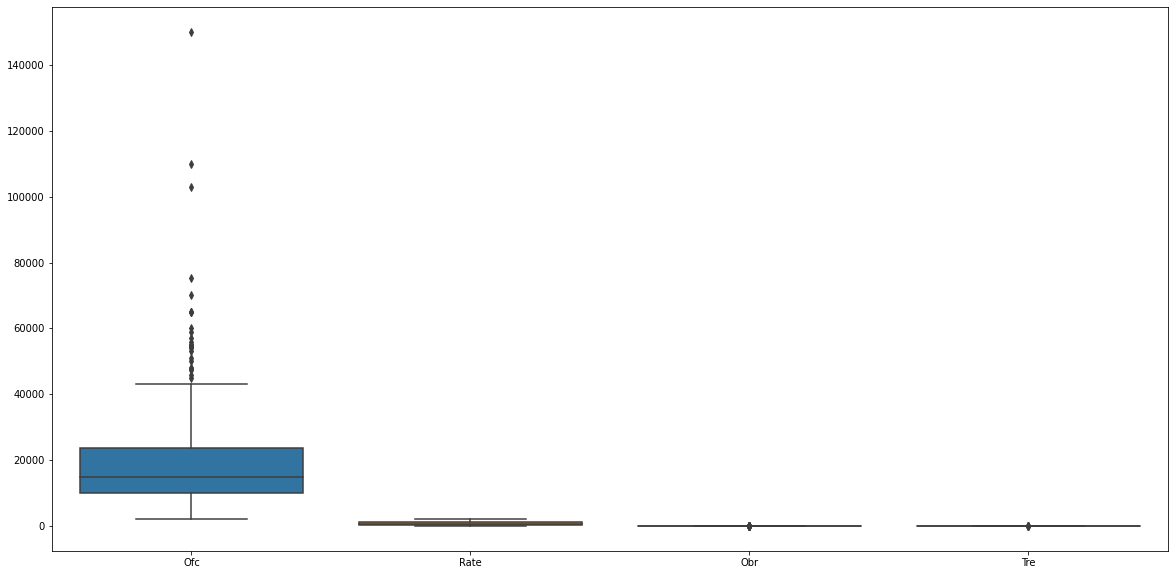

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(data=x_data[["Ofc","Rate","Obr","Tre"]])
plt.show()

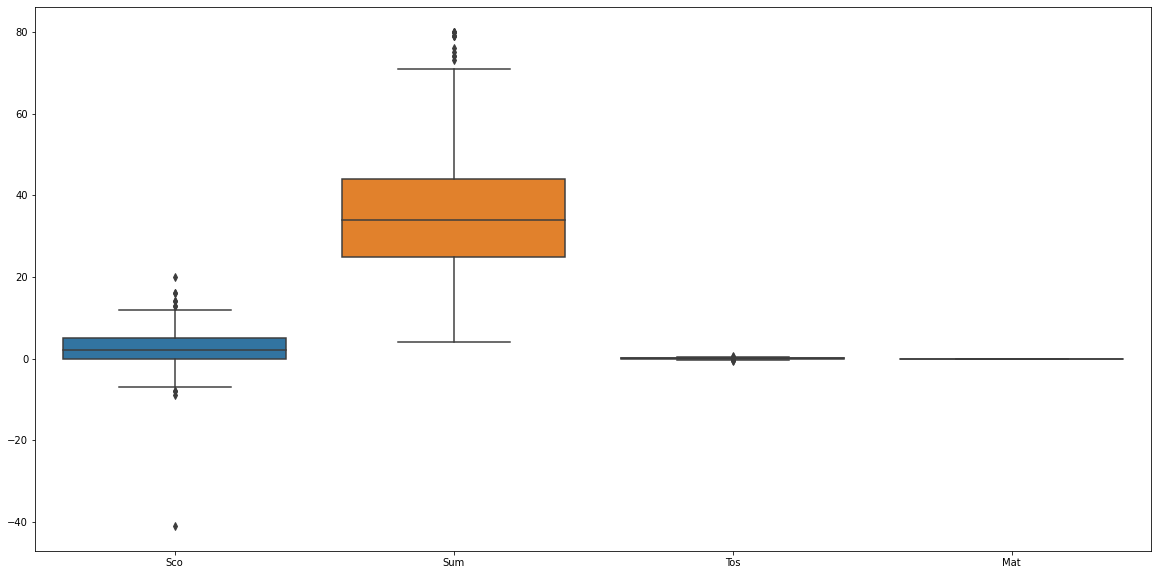

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(data=x_data[["Sco","Sum","Tos","Mat"]])
plt.show()

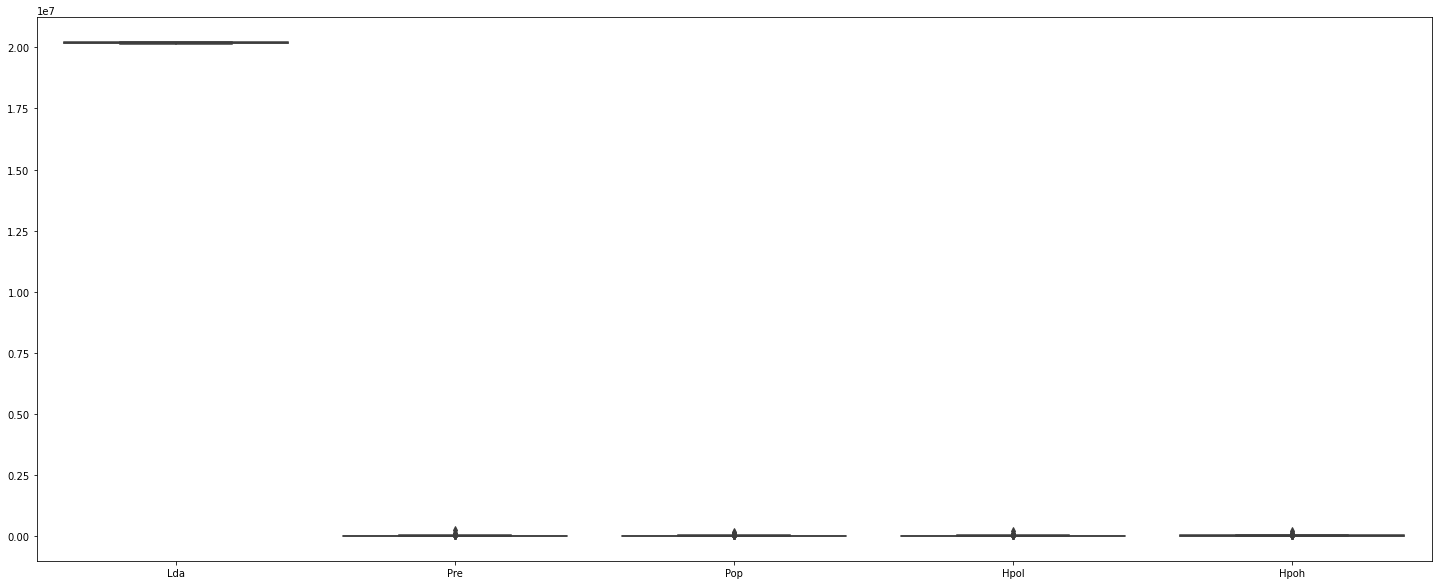

In [20]:
plt.figure(figsize=(25,10))
sns.boxplot(data=x_data[["Lda","Pre","Pop","Hpol","Hpoh"]])
plt.show()

In [21]:
Q1 = x_data[['Sal', 'Ofc', 'Sco', 'Sum']].quantile(q=0.25)
Q3 = x_data[['Sal', 'Ofc', 'Sco', 'Sum']].quantile(q=0.75)
print(Q1)
print(Q3)

Sal    14028.0
Ofc    10000.0
Sco        0.0
Sum       25.0
Name: 0.25, dtype: float64
Sal    58187.0
Ofc    23750.0
Sco        5.0
Sum       44.0
Name: 0.75, dtype: float64


In [22]:
IQR = Q3-Q1
IQR

Sal    44159.0
Ofc    13750.0
Sco        5.0
Sum       19.0
dtype: float64

In [23]:
IQR_data = x_data[(x_data['Sal'] <= Q3['Sal']+1.5*IQR['Sal']) & (df['Sal'] >= Q1['Sal']-1.5*IQR['Sal'])]
IQR_data = IQR_data[(IQR_data['Ofc'] <= Q3['Ofc']+1.5*IQR['Ofc']) & (IQR_data['Ofc'] >= Q1['Ofc']-1.5*IQR['Ofc'])]
IQR_data = IQR_data[(IQR_data['Sco'] <= Q3['Sco']+1.5*IQR['Sco']) & (IQR_data['Sco'] >= Q1['Sco']-1.5*IQR['Sco'])]
IQR_data = IQR_data[(IQR_data['Sum'] <= Q3['Sum']+1.5*IQR['Sum']) & (IQR_data['Sum'] >= Q1['Sum']-1.5*IQR['Sum'])]

IQR_data = IQR_data[['Sal', 'Ofc', 'Sco', 'Sum']]

In [24]:
iqr_df = IQR_data.join(y_data,how='left')
iqr_df

,Sal,Ofc,Sco,Sum,Beg
0,61174,25000,3,28,50000
1,60760,18600,12,45,18400
2,10383,13000,4,56,17150
4,3879,16000,2,54,20600
5,31900,40000,8,45,41000
...,...,...,...,...,...
385,54240,27500,5,38,37100
387,51059,9100,5,24,8190
388,104434,13000,12,41,21650
389,69032,8300,6,38,16600


In [25]:
x_data_ = iqr_df[['Sal', 'Ofc', 'Sco', 'Sum']]
y_data_ = iqr_df[['Beg']]

min_max_scaler = preprocessing.MinMaxScaler()
X_data_ = min_max_scaler.fit_transform(x_data_)

X_train, X_test, y_train, y_test = train_test_split(
    X_data_, y_data_, test_size=0.2, random_state=42)
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print(mlr.score(X_train, y_train))

0.7253984839552692
